In [4]:
import pandas as pd  #import dependencies
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
import numpy as np

#set visualization styles of this
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12,8)

In [5]:
#Load dataset form Hugging Face
print("Loading medical tanscriptions - dataset !")
dataset = load_dataset("hpe-ai/medical-cases-classification-tutorial")
print(dataset)

#convert to the pandas dataframes - (training ,validations and testing )
train_df = pd.DataFrame(dataset['train'])
val_df = pd.DataFrame(dataset['validation'])
test_df = pd.DataFrame(dataset['test'])

print("Dataset Loaded sucessfuly ✅!")

print(f"Training set :{len(train_df)}")
print(f"Validation set:{len(val_df)}")
print(f"test set:{len(val_df)}")

print(f"Total sets:{len(train_df)+len(val_df)+len(test_df)}")



Loading medical tanscriptions - dataset !


Repo card metadata block was not found. Setting CardData to empty.


DatasetDict({
    train: Dataset({
        features: ['description', 'transcription', 'sample_name', 'medical_specialty', 'keywords'],
        num_rows: 1724
    })
    validation: Dataset({
        features: ['description', 'transcription', 'sample_name', 'medical_specialty', 'keywords'],
        num_rows: 370
    })
    test: Dataset({
        features: ['description', 'transcription', 'sample_name', 'medical_specialty', 'keywords'],
        num_rows: 370
    })
})
Dataset Loaded sucessfuly ✅!
Training set :1724
Validation set:370
test set:370
Total sets:2464


In [6]:
#Display basic information about this dataset
print("Dataset stucture :")
print(train_df.info())
print("\n display first few rows :")
print(train_df.head())

Dataset stucture :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1724 entries, 0 to 1723
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   description        1724 non-null   object
 1   transcription      1724 non-null   object
 2   sample_name        1724 non-null   object
 3   medical_specialty  1724 non-null   object
 4   keywords           1109 non-null   object
dtypes: object(5)
memory usage: 67.5+ KB
None

 display first few rows :
                                         description  \
0  Pacemaker ICD interrogation.  Severe nonischem...   
1  Erythema of the right knee and leg, possible s...   
2  Left cardiac catheterization with selective ri...   
3  Patient with a history of coronary artery dise...   
4  Cardiac evaluation and treatment in a patient ...   

                                       transcription  \
0  PROCEDURE NOTE: , Pacemaker ICD interrogation....   
1  PREOPERATIVE DIAGNOSE

In [7]:
#Column anlysis and their data types 
print("column Anlysis .!")
for col in train_df.columns:
    print(f"\n{col}:")
    print(f"  Data type: {train_df[col].dtype}")
    print(f"  Non-null values: {train_df[col].count()}/{len(train_df)}")
    if train_df[col].dtype == 'object':
        print(f"  Unique values: {train_df[col].nunique()}")
        if col == 'medical_specialty':
            print(f"  Categories: {sorted(train_df[col].unique())}")

column Anlysis .!

description:
  Data type: object
  Non-null values: 1724/1724
  Unique values: 1259

transcription:
  Data type: object
  Non-null values: 1724/1724
  Unique values: 1263

sample_name:
  Data type: object
  Non-null values: 1724/1724
  Unique values: 1294

medical_specialty:
  Data type: object
  Non-null values: 1724/1724
  Unique values: 13
  Categories: ['Cardiovascular / Pulmonary', 'ENT - Otolaryngology', 'Gastroenterology', 'Hematology - Oncology', 'Nephrology', 'Neurology', 'Neurosurgery', 'Obstetrics / Gynecology', 'Ophthalmology', 'Orthopedic', 'Pediatrics - Neonatal', 'Psychiatry / Psychology', 'Radiology']

keywords:
  Data type: object
  Non-null values: 1109/1724
  Unique values: 971


In [8]:
# Analyze target variable distribution across all splits
combined_df = pd.concat([train_df, val_df, test_df], ignore_index=True)

specialty_counts = combined_df['medical_specialty'].value_counts()
print("Medical Specialty Distribution:")
print(specialty_counts)
print(f"\nTotal specialties: {len(specialty_counts)}")
print(f"Most common: {specialty_counts.index[0]} ({specialty_counts.iloc[0]} cases)")
print(f"Least common: {specialty_counts.index[-1]} ({specialty_counts.iloc[-1]} cases)")
print(f"Imbalance ratio: {specialty_counts.iloc[0] / specialty_counts.iloc[-1]:.2f}:1")

Medical Specialty Distribution:
medical_specialty
Cardiovascular / Pulmonary    742
Orthopedic                    408
Neurology                     282
Gastroenterology              222
Obstetrics / Gynecology       182
Hematology - Oncology         120
Neurosurgery                  109
ENT - Otolaryngology           80
Nephrology                     71
Psychiatry / Psychology        68
Ophthalmology                  66
Pediatrics - Neonatal          64
Radiology                      50
Name: count, dtype: int64

Total specialties: 13
Most common: Cardiovascular / Pulmonary (742 cases)
Least common: Radiology (50 cases)
Imbalance ratio: 14.84:1


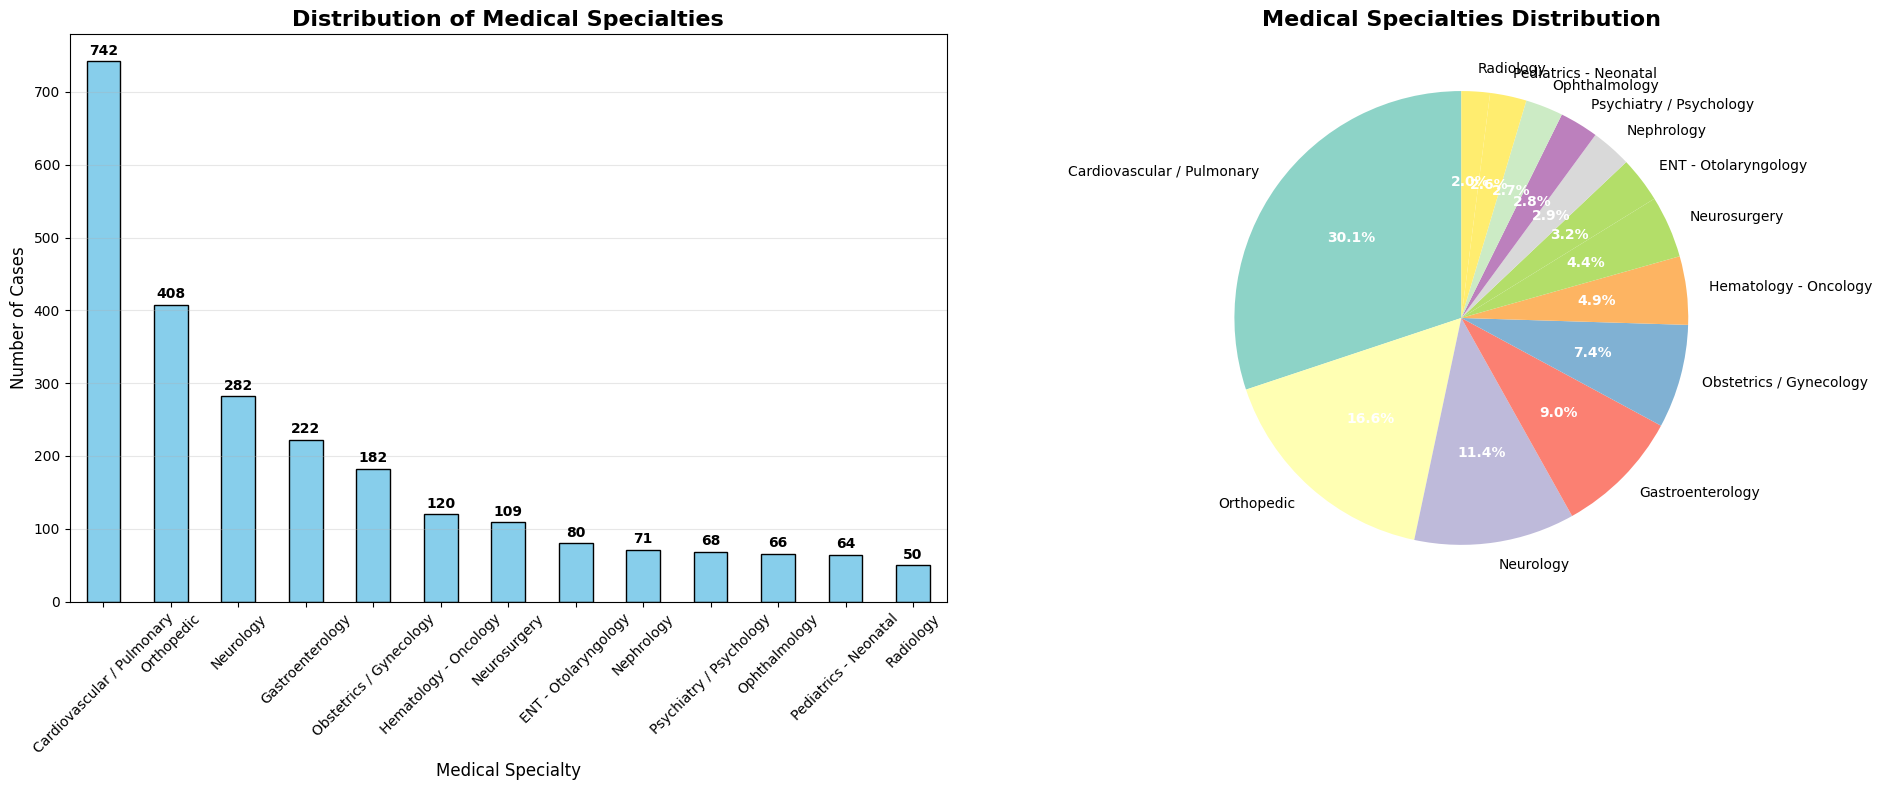

In [9]:
# Visualize class distribution in (Bar chart and Pie chart)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# ---Bar chart---
specialty_counts.plot(kind='bar', ax=ax1, color='skyblue', edgecolor='black')
ax1.set_title('Distribution of Medical Specialties', fontsize=16, fontweight='bold')
ax1.set_xlabel('Medical Specialty', fontsize=12)
ax1.set_ylabel('Number of Cases', fontsize=12)
ax1.tick_params(axis='x', rotation=45, labelsize=10)
ax1.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(specialty_counts.values):
    ax1.text(i, v + 5, str(v), ha='center', va='bottom', fontweight='bold')

# ---Pie chart---
colors = plt.cm.Set3(np.linspace(0, 1, len(specialty_counts)))
wedges, texts, autotexts = ax2.pie(specialty_counts.values, 
                                   labels=specialty_counts.index,
                                   autopct='%1.1f%%',
                                   colors=colors,
                                   startangle=90)
ax2.set_title('Medical Specialties Distribution', fontsize=16, fontweight='bold')

# Improve pie chart readability
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.tight_layout()
plt.show()    

In [ ]:
#Text Baesd analysis

#analyze text length characteristics
def analyze_text_lengths(df, text_column, title):
    lengths = df[text_column].str.len()
    word_counts = df[text_column].str.split().str.len()
    
    print(f"\n{title} Analysis:")
    print(f"Character length - Mean: {lengths.mean():.0f}, Median: {lengths.median():.0f}")
    print(f"Character length - Min: {lengths.min()}, Max: {lengths.max()}")
    print(f"Word count - Mean: {word_counts.mean():.0f}, Median: {word_counts.median():.0f}")
    print(f"Word count - Min: {word_counts.min()}, Max: {word_counts.max()}")
    
    return lengths, word_counts

# Analyze in transcription and description fields
trans_lengths, trans_words = analyze_text_lengths(combined_df, 'transcription', 'Transcription')
desc_lengths, desc_words = analyze_text_lengths(combined_df, 'description', 'Description')



Transcription Analysis:
Character length - Mean: 3319, Median: 2852
Character length - Min: 13, Max: 15216
Word count - Mean: 503, Median: 427
Word count - Min: 1, Max: 2460

Description Analysis:
Character length - Mean: 140, Median: 124
Character length - Min: 14, Max: 491
Word count - Mean: 20, Median: 16
Word count - Min: 2, Max: 76
